Use any SVM Library to classify these datasets
https://drive.google.com/file/d/1wxPLNOiGmgBnP-fRqVsgVK9-Wv3juL9z/view?usp=drive_web&authuser=0





1. Use different kernels with and without regularization (40 pt)
2. Comment on each result (20 pt)
3. Visualize every single step (20 pt)
3. You are required to prepare a report and presentation discussing the following (20 pt):
  * Problem definition and motivation: the task you are working on and why it is important.
  * Dataset: describe the dataset.
  * Approach and methodology: description of your approach including data pre-processing, model parameters, and model evaluation.
  *  Implementation: Discuss the tools and libraries used in your analysis and the process you used to tune the hyperparameters.
  * Conclusion: final evaluation of your approach, things you learned during the implementation, and tips to improve your models


Bonus:
<br> * Build your own SVM. You can use any quadratic programming library to solve Lagrange equations. (5 pt)
<br> * Use GridSearchCV with various hyperparameters, kernel options, and regularization techniques to optimize your model's performance. (5 pt)

# **Import the needed libraries**

In [235]:
import numpy as np
import pandas as pd
import itertools
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.gridspec as gridspec
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap

# Upload data file and splite the features and target

In [236]:
def xy_of_dataset(set_name):
    if set_name == 'Aggregation':
        data = "Aggregation.csv"
    elif set_name == 'Compound':
        data = "Compound.csv"
    elif set_name == 'Flame':
        data = "Flame.csv"
    elif set_name == 'Jain':
        data = "Jain.csv"
    elif set_name == 'Spiral':
        data = "Spiral.csv"
    elif set_name == 'Pathbased':
        data = "Pathbased.csv"
    df = pd.read_csv(data, header=None)
    print( df.describe())
    df.dropna()
    df.columns = ['target', 'x1', 'x2']
    x = df[['x1', 'x2']]
    y = df['target']
    num_classes = y.nunique()

    print("Number of classes:", num_classes)
    x = x.values
    y = y.values
    return x, y

In [237]:
 x, y = xy_of_dataset('Pathbased')
# # List of dataset names
# dataset_names = ['Aggregation', 'Compound', 'Flame', 'Jain', 'Spiral', 'Pathbased']

# # Initialize an empty list to store the X_train and y_train datasets
# datasets = []

# for name in dataset_names:
#     # Get X and y for the current dataset
#     X, y = xy_of_dataset(name)

#     # Write dataset description
#     print(f"Dataset Description for {name}:")
#     print(f"Number of samples: {len(X)}")
#     print(f"Number of features: {X.shape[1]}")
#     print(f"Number of classes: {len(np.unique(y))}")
#     print()  # Add a newline for separation

#     # Split the dataset and add X_train, y_train to the list
#     X_train, _, y_train, _ = train_test_split(X, y, test_size=0.4, random_state=42)
#     datasets.append((X_train, y_train))

# # Output the dataset descriptions and store X_train, y_train sets in the 'datasets' list


                0           1           2
count  300.000000  300.000000  300.000000
mean     1.943333   18.846500   17.188500
std      0.822015    8.253238    5.855957
min      1.000000    4.700000    3.650000
25%      1.000000   11.287500   13.687500
50%      2.000000   19.100000   16.550000
75%      3.000000   26.250000   19.562500
max      3.000000   33.050000   31.750000
Number of classes: 3


#Splite the set to 3 datasets







1-traing 60%
2-validation 20%
3-testing 20%**bold text**

In [238]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


#Use different kernels with and without regularization

In [ ]:

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

svm_linear_no_reg = SVC(kernel='linear', C=1.0)
svm_linear_with_reg = SVC(kernel='linear', C=0.1)
svm_poly_no_reg = SVC(kernel='poly', degree=3, C=1.0)
svm_poly_with_reg = SVC(kernel='poly', degree=3, C=0.1)
svm_rbf_no_reg = SVC(kernel='rbf', gamma=0.7, C=1.0)
svm_rbf_with_reg = SVC(kernel='rbf', gamma=0.7, C=0.1)


svm_linear_no_reg.fit(X_train2, y_train)


svm_linear_with_reg.fit(X_train2, y_train)
svm_poly_no_reg.fit(X_train2, y_train)
svm_poly_with_reg.fit(X_train2, y_train)
svm_rbf_no_reg.fit(X_train2, y_train)
svm_rbf_with_reg.fit(X_train2, y_train)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

classifiers = [svm_linear_no_reg, svm_linear_with_reg, svm_poly_no_reg, svm_poly_with_reg, svm_rbf_no_reg, svm_rbf_with_reg]
titles = ['Linear (No Regularization)', 'Linear (With Regularization)', 'Polynomial (No Regularization)', 'Polynomial (With Regularization)', 'RBF (No Regularization)', 'RBF (With Regularization)']

for clf, ax, title in zip(classifiers, axes.flatten(), titles):
    plot_decision_regions(X=X_train2, y=y_train, clf=clf, legend=2, markers='x^sv<>', ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

linear_no_reg_accuracy = accuracy_score(y_test, svm_linear_no_reg.predict(X_test2))
linear_with_reg_accuracy = accuracy_score(y_test, svm_linear_with_reg.predict(X_test2))
poly_no_reg_accuracy = accuracy_score(y_test, svm_poly_no_reg.predict(X_test2))
poly_with_reg_accuracy = accuracy_score(y_test, svm_poly_with_reg.predict(X_test2))
rbf_no_reg_accuracy = accuracy_score(y_test, svm_rbf_no_reg.predict(X_test2))
rbf_with_reg_accuracy = accuracy_score(y_test, svm_rbf_with_reg.predict(X_test2))s

print("Linear Kernel without regularization accuracy:", linear_no_reg_accuracy)
print("Linear Kernel with regularization accuracy:", linear_with_reg_accuracy)
print("Polynomial Kernel without regularization accuracy:", poly_no_reg_accuracy)
print("Polynomial Kernel with regularization accuracy:", poly_with_reg_accuracy)
print("RBF Kernel without regularization accuracy:", rbf_no_reg_accuracy)
print("RBF Kernel with regularization accuracy:", rbf_with_reg_accuracy)


In [239]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))

clf1 = SVC( kernel='linear',C=1)
clf3 = SVC( kernel='poly',C=1)
clf4 = SVC( kernel='rbf',C=1)
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = [' Linear Kernel' , ' Polynomial Kernel'  ,' RBF Kernel']
for clf, lab, grd in zip([clf1, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()


#best kernel


In [240]:

param_grid_kernel = {'kernel': ['linear', 'poly', 'rbf']}

svm_model = SVC()
# Perform grid search with cross-validation to find the best kernel and hyperparameters
grid_search = GridSearchCV(svm_model, param_grid_kernel, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best kernel from the grid search results
best_kernel = grid_search.best_params_['kernel']


# Select the best C

In [241]:
#param_grid_C = {'C': list(np.arange(100, 300, 1))}
param_grid_C = {'C': list(np.arange(0, 10, 0.1))}

grid_search_C = GridSearchCV(svm_model, param_grid_C,cv=5)
grid_search_C.fit(X_train, y_train)

best_C = grid_search_C.best_params_['C']


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_

#Select best gamma

In [242]:
if best_kernel=='rbf':
  param_grid_g = {'gamma':  np.append(np.arange(0.001, 1, 0.0001), 'scale')}
  #param_grid_g = {'gamma': list(np.arange(0, 10, 0.01))}


  grid_search_g = GridSearchCV(svm_model, param_grid_g,cv=5)  # Initialize the grid search with cross-validation
  grid_search_g.fit(X_train, y_train)  # Fit the grid search to the training data

  best_gamma = grid_search_g.best_params_['gamma']  # Get the best gamma value


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [243]:
if best_kernel=='poly':
  grid_search_degree = {'degree': np.arange(1, 10)}


  svm_model = SVC(kernel='poly')


  grid_search_degree = GridSearchCV(svm_model, grid_search_degree, cv=5)
  grid_search_degree.fit(X_train, y_train)

  best_degree = grid_search_degree.best_params_['degree']


#ploting best model

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


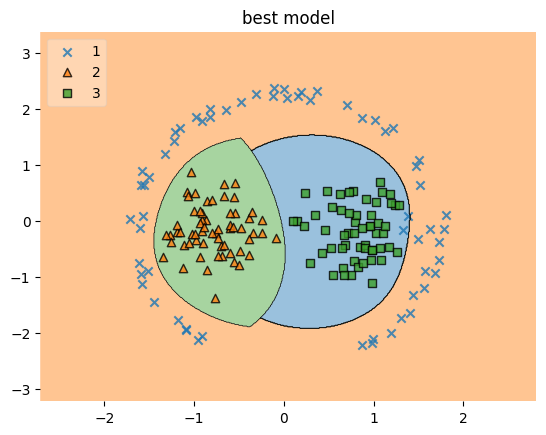

In [244]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

if best_kernel=='linear':
  best_svm_model = SVC(C=best_C,  kernel=best_kernel)

elif best_kernel=='rbf':
  best_svm_model = SVC(C=best_C, gamma=best_gamma, kernel=best_kernel)

elif best_kernel=='poly':
  best_svm_model = SVC(C=best_C, degree=best_degree, kernel=best_kernel)




best_svm_model.fit(X_train, y_train)

fig = plot_decision_regions(X=X_train, y=y_train, clf=best_svm_model, legend=2, markers='x^sv<>')
plt.title("best model")

plt.show()



#Validation accuracy

In [245]:
X_val = scaler.transform(X_val)
y_pred = best_svm_model.predict(X_val)
test_accuracy = accuracy_score(y_val, y_pred)*100
print(f"The accuracy of the best SVM model on the validation set is: {test_accuracy:.4f}%")
best_svm_model.get_params()

The accuracy of the best SVM model on the validation set is: 100.0000%


{'C': 5.6000000000000005,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#Test accuracy

In [246]:
X_test = scaler.transform(X_test)
y_pred = best_svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)*100
print(f"The accuracy of the best SVM model on the test set is: {test_accuracy:.4f}%")

The accuracy of the best SVM model on the test set is: 98.3333%
